# **Proyek Akhir : Membuat Model Sistem Rekomendasi**

---

## Dicoding Submission
## Machine Learning Terapan

---

Kriteria submission:
- Project merupakan hasil pekerjaan sendiri.
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.
- Dataset yang dipakai bebas, asal bisa digunakan untuk membuat sistem rekomendasi.
- Memberikan **dokumentasi** menggunakan **text cell** pada notebook (.ipynb) untuk menjelaskan **setiap tahapan proyek**.
- Menentukan solusi permasalahan dengan memilih pendekatan berikut:
    - Content-based Filtering
    - Collaborative Filtering
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda dari mulai pemilihan domain permasalahan (problem domain), data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang **Detail Laporan**.

---

Saran:
- Menerapkan Rubrik/Kriteria Penilaian (Tambahan) untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.


---


Tips:
- Menerapkan **Rubrik/Kriteria Penilaian (Tambahan)** untuk mendapatkan skala penilaian (bintang) yang lebih tinggi.
- Anda dapat memilih beberapa topik rekomendasi (namun tidak terbatas pada daftar) berikut:
  - Rekomendasi film
  - Rekomendasi buku
  - Rekomendasi musik
  - Rekomendasi video
  - Rekomendasi produk
  - Rekomendasi artikel
  - Rekomendasi berita
  - dsb.

- Untuk export project yang Anda kerjakan di Colaboratory sebagai berkas ipynb, klik tombol file yang berada di pojok kiri atas Colaboratory. Kemudian pilih **download .ipynb** dan **download .py**.
- Untuk melakukan training pada Colab dari data yang ada pada Drive, dapat Anda lihat caranya pada [tautan berikut](https://www.youtube.com/watch?v=Gvwuyx_F-28&t=384s).
---

Detail penilaian submission:
- **Bintang 1**: Semua ketentuan terpenuhi, tetapi terdapat indikasi plagiat dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.
- **Bintang 2**: Semua ketentuan terpenuhi, tetapi penulisan kode dan laporan berantakan.
- **Bintang 3**: Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- **Bintang 4**: Semua ketentuan terpenuhi, menerapkan minimal tiga (3) kriteria **Rubrik Penilaian Tambahan** pada laporan.
- **Bintang 5**: Semua ketentuan terpenuhi, menerapkan minimal **seluruh kriteria (6) Rubrik Penilaian Tambahan** pada laporan.

---

# Data Diri

- Nama: Sandy Susanto
- E-mail: susantosandy12@gmail.com
- Beasiswa : IDCamp2023

---
---

# **1. *Library Import***

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`numpy`](https://numpy.org) untuk melakukan pemrosesan matematis berupa himpunan, *array*, matriks multidimensi, dan vektorisasi.

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org) untuk melakukan visualisasi menggunakan *plotting*.

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# **2. *Data Loading***

## 2.1 *Kaggle Credential*

**Menghubungkan environtment** [`Colab`](https://colab.research.google.com/) dengan [Kaggle Dataset](https://kaggle.com/) menggunakan `Kaggle.json` yang didapatkan dari meng-*generate* [Kaggle API](https://www.kaggle.com/docs/api) token.

---
Gunakan `!python` untuk mengecek versi [`pyhton`](https://www.python.org/) di [`Colab`](https://colab.research.google.com/) dan memakai `!gdown` untuk men*download* `Kaggle.json` yang disimpan di [Google Drive](https://drive.google.com/)



In [2]:
#Cek python dulu
!python --version

Python 3.10.12


In [3]:
#Download Kaggle Credential
!pip install -q kaggle
!pip install --upgrade gdown
!gdown 1-78YSIrsevhJCtAsWGp2D6j189CdGP76
file = open("kaggle.json", "r")
data = file.read()
print(data)

Downloading...
From: https://drive.google.com/uc?id=1-78YSIrsevhJCtAsWGp2D6j189CdGP76
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 295kB/s]
{"username":"sandysan0","key":"7e6b624e4c76074c4193eb154e7b7d80"}


Membuat *environtment* di `/root` dan mengetest *Kaggle API Command*

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod u=rw,g=,o= ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets list

kaggle.json
ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          13805        253  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                                  3KB  2024-03-02 18:50:30           3442         54  0.9411765        
arnavvvvv/spotify-music                                       Top Spotify Songs                                   47KB  2024-03-06 05:20:29           3681         56  1.0              
tarunrm09/climate-change-indicators                           C

## 2.2 *Dataset Download*

Untuk proyek ini, *dataset* yang digunkan berjudul [*Book Recommendation Dataset*](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset) dari Kaggle. *File* yang akan diunduh masih dalam format terkompresi dengan nama `book-recommendation-dataset.zip`.

In [5]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Selanjutnya adalah menggunakan metode `extractall` dari modul `zipfile` untuk mengekstrak berkas `book-recommendation-dataset.zip`. Dengan menggunakan `zip.extractall`, adad didapatkan tiga berkas [`.csv`](https://en.wikipedia.org/wiki/Comma-separated_values 'Wikipedia - Comma-separated values'): `Books.csv`, `Ratings.csv`, dan `Users.csv`, yang akan digunakan dalam proyek rekomendasi buku ini.

In [6]:
with zipfile.ZipFile('book-recommendation-dataset.zip','r') as zip:
  zip.extractall('/content/')

# **3. *Data Understanding***

## 3.1 Atribut Dasar dari *Dataset*

Gunakan *library* [Pandas](https://pandas.pydata.org 'Python Data Analysis Library') untuk memuat file `Books.csv`, `Ratings.csv`, `Users.csv` ke dalam *dataframe* yang akan disimpan dalam variabel `books`, `rating`, dan `users`. Ini akan mengubah data dari format `.csv` menjadi struktur *dataframe* yang dapat dikelola dengan Python.

In [7]:
books = pd.read_csv('Books.csv')
rating = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

<ipython-input-7-8e022230439b>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


Untuk mengetahui berapa banyak nilai unik yang ada dalam setiap kolom dari *dataframe* dapat dengan memanfaatkan metode `.unique()`.

In [8]:
# Mendefinisikan dictionary untuk menyimpan informasi yang ingin dicetak
info_buku = {
    'ISBN': ('Jumlah data ISBN', books),
    'Book-Title': ('Jumlah data Judul', books),
    'Book-Author': ('Jumlah data Penulis', books),
    'Publisher': ('Jumlah data Penerbit', books),
    'Year-Of-Publication': ('Jumlah data Tahun', books)
}

info_rating = {
    'User-ID': ('Jumlah data Pembaca', rating),
    'ISBN': ('Jumlah data Buku', rating)
}

# Fungsi untuk mencetak informasi
def cetak_info(info_dict):
    for kolom, (deskripsi, df) in info_dict.items():
        print(f'{deskripsi: <30}: {df[kolom].nunique()}')

# Mencetak informasi buku, rating, dan user
cetak_info(info_buku)
print('=====' * 9)
cetak_info(info_rating)
print(f'Jumlah data Rating yang diterima : {len(rating)}')
print('=====' * 9)
print(f'Jumlah data User : {len(users)}')


Jumlah data ISBN              : 271360
Jumlah data Judul             : 242135
Jumlah data Penulis           : 102023
Jumlah data Penerbit          : 16807
Jumlah data Tahun             : 202
Jumlah data Pembaca           : 105283
Jumlah data Buku              : 340556
Jumlah data Rating yang diterima : 1149780
Jumlah data User : 278858


## 3.2 *Univariate Exploratory Data Analysis* (EDA)

*Exploratory Data Analysis* ([EDA](https://ankushmulkar.medium.com/complete-exploratory-data-analysis-step-by-step-guide-for-data-analyst-34a07156217a)) merupakan salah satu kegiatan kunci yang sering dijalankan ketika melakukan analisis Data. Kegiatan ini melibatkan penggalian dan pemeriksaan data untuk menemukan wawasan, menyingkap pola, serta menemukan hubungan dan ketidakteraturan yang tersembunyi dalam data.

Dalam EDA, kita menggunakan teknik visualisasi dan statistik deskriptif sebagai cara untuk memahami dan menginterpretasikan data. Sasaran utamanya adalah untuk memperoleh pemahaman yang lebih dalam terhadap data, menemukan pola, dan melakukan pengujian terhadap hipotesis yang akan menjadi panduan dalam analisis data yang lebih detail.

### 3.2.1 *Dataset* Books

*Exploratory Data Analysis* (EDA) untuk *dataframe* `Books`.

In [9]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Semua fitur memiliki tipe data object

### 3.2.2 *Dataset* Rating

*Exploratory Data Analysis* (EDA) untuk *dataframe* `rating`.

In [11]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
rating.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Untuk mendapatkan gambaran statistik dari kolom `Book-Rating` dalam *dataframe* `Ratings`, kita akan menghitung dan menampilkan ukuran-ukuran statistik dasar. Ini termasuk menghitung rata-rata, standar deviasi, nilai minimum dan maksimum, serta nilai-nilai kuartil yang mencakup kuartil pertama, median, dan kuartil ketiga. Semua ini memberikan wawasan tentang distribusi nilai *rating* yang diberikan oleh pengguna pada buku.

In [14]:
rating['Book-Rating'].describe().apply(lambda x: '%.f' % x)

count    1149780
mean           3
std            4
min            0
25%            0
50%            0
75%            7
max           10
Name: Book-Rating, dtype: object

Untuk menampilkan distribusi frekuensi dari *rating* yang diberikan pengguna pada buku, kita akan membuat histogram. Grafik ini akan menggambarkan seberapa sering *rating* tertentu, dari 1 sampai 10, diberikan oleh pengguna untuk buku-buku yang telah mereka baca.

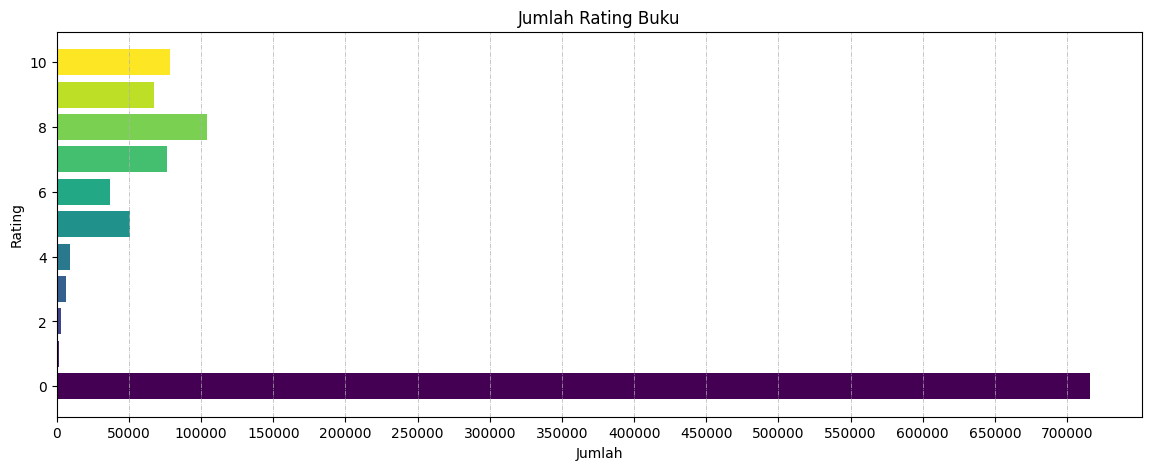

In [15]:
colors = plt.cm.viridis(np.linspace(0, 1, 11))

# Membuat histogram frekuensi rating buku
plt.figure(figsize=(14, 5))
plt.barh(rating['Book-Rating'].value_counts().sort_index().index,
         rating['Book-Rating'].value_counts().sort_index().values,
         color=colors)
plt.title('Jumlah Rating Buku')
plt.xlabel('Jumlah')
plt.ylabel('Rating')
plt.xticks(np.arange(0, 720000, 50000))
plt.grid(axis='x', linestyle='-.', linewidth=0.5)
plt.show()


Dari grafik histogram "Jumlah Rating Buku" yang telah divisualisasikan, kita dapat melihat bahwa skor *rating* yang paling sering muncul adalah 0, dengan total sekitar 700.000 kali lebih. Karena *rating* 0 ini bisa menimbulkan bias dalam analisis data, ada baiknya kita mengeluarkan *rating* tersebut selama proses persiapan data untuk memastikan hasil analisis yang lebih akurat.

### 3.2.3 *Dataset* User

*Exploratory Data Analysis* (EDA) untuk *dataframe* `users`.

In [16]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Dari tabel *dataframe* `Users`, terlihat adanya nilai kosong atau `NaN` pada kolom `Age`. Nilai-nilai ini memerlukan penanganan khusus selama proses persiapan data untuk memastikan keakuratan analisis selanjutnya.

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Untuk *dataframe* `Users`, kita akan melihat ukuran statistik yang mencakup total entri (`count`), nilai rata-rata (`mean`), variasi data (`std`), serta nilai-nilai ekstrem dan kuartil (`min`, `max`, `25%`, `50%`, `75%`) yang memberikan gambaran tentang distribusi usia pengguna.

In [18]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Jika diperhatikan, max dari fitur `age` adalah 244, berarti ada pembaca buku yang berusia 244 tahun. Secara sekilas, ini tidak masuk akal, ada manusia modern yang berusia lebih dari 200 tahun. Untuk itu kita akan ekplorasi lebih jauh pada fitur `age` pada bagian *data preparation*.

# **4. *Data Preprocessing***

Proses pra-pemrosesan data, atau *data preprocessing*, adalah langkah penting yang harus diambil sebelum memulai pemodelan. Langkah ini melibatkan transformasi data asli menjadi format yang lebih terstruktur dan bersih, yang kemudian dapat digunakan dalam analisis lebih lanjut. Untuk kasus ini, *data preprocessing* mencakup penyesuaian nama-nama kolom di setiap *dataframe*, menggabungkan informasi ISBN, serta mengintegrasikan *users* untuk mendapatkan gambaran lengkap tentang dataset.

## 4.1 Penyesuaian Nama Kolom/Atribut

Menggunakan fungsi `.assign()` untuk mengubah nama kolom atau atribut dalam *dataframe* bertujuan agar proses referensi kolom atau atribut di langkah-langkah berikutnya menjadi lebih sederhana dan intuitif.

### 4.1.1 Books





In [19]:
new_columns = {
    'ISBN': 'isbn',
    'Book-Title': 'book_title',
    'Book-Author': 'book_author',
    'Year-Of-Publication': 'pub_year',
    'Publisher': 'publisher',
    'Image-URL-S': 'image_s_url',
    'Image-URL-M': 'image_m_url',
    'Image-URL-L': 'image_l_url'
}

books = books.assign(**{new_columns[old]: books[old] for old in new_columns}).drop(columns=new_columns.keys())

In [20]:
books

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### 4.1.2 Ratings

In [21]:
new_columns = {
    'User-ID': 'user_id',
    'ISBN': 'isbn',
    'Book-Rating': 'book_rating'
}

rating = rating.assign(**{new_name: rating[old_name] for old_name, new_name in new_columns.items()}).drop(columns=new_columns.keys())

In [22]:
rating

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


### 4.1.3 Users

In [23]:
new_columns = {
    'User-ID'  : 'user_id',
    'Location' : 'location',
    'Age'      : 'age'
}

users = users.assign(**{new_name: users[old_name] for old_name, new_name in new_columns.items()}).drop(columns=new_columns.keys())

In [24]:
users

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


## 4.2 Menggabungkan Data Dengan Fitur ISBN

Fungsi `.concatenate` dari *library* [`numpy`](https://numpy.org) digunakan untuk menggabungkan data ISBN yang terdapat di *dataframe* `df_b` untuk buku dan `df_r` untuk *rating*. Proses ini menyatukan informasi ISBN dari kedua *dataframe* ke dalam satu kolom `isbn`.

In [25]:
ISBNAll = np.unique(np.concatenate([books['isbn'].unique(), rating['isbn'].unique()]))
print('Jumlah Buku berdasarkan ISBN :', len(ISBNAll))

Jumlah Buku berdasarkan ISBN : 341765


## 4.3 Menggabungkan Data *User*

Fungsi `.concatenate` dari *library* [`numpy`](https://numpy.org) digunakan untuk menyatukan data `user_id` yang berasal dari *dataframe* `rating` dan *dataframe* `users`. Proses ini menggabungkan kedua set data berdasarkan kolom `user_id`.

In [26]:
USERAll = np.unique(np.concatenate([rating['user_id'].unique(), users['user_id'].unique()]))
print('Jumlah Buku berdasarkan ISBN :', len(USERAll))

Jumlah Buku berdasarkan ISBN : 278858


# **5. *Data Preparation***

Proses persiapan data, atau *data preparation*, adalah langkah krusial yang mendahului fase pembuatan model *machine learning*. Langkah ini melibatkan modifikasi data ke format yang sesuai untuk pemodelan. Dalam konteks ini, *data preparation* mencakup penanganan nilai yang hilang, verifikasi keberadaan data ganda, serta integrasi data dari *dataframe* *`books`* dan *`rating`* untuk memastikan data siap digunakan.

## 5.1 *Pengecekan* *Missing Value*

Untuk mengetahui jumlah total nilai yang tidak ada atau *missing* dalam sebuah *dataframe*, kita dapat memanfaatkan metode `.isnull().sum()`. Metode ini akan menghitung dan memberikan jumlah keseluruhan nilai yang hilang di seluruh kolom *dataframe*.

### 5.1.1 Books

In [27]:
books.isnull().sum()

isbn           0
book_title     0
book_author    1
pub_year       0
publisher      2
image_s_url    0
image_m_url    0
image_l_url    3
dtype: int64

Dari informasi yang diberikan, terlihat bahwa dalam *dataframe* `books`, ada beberapa entri yang kosong. Khususnya, kolom `book_author` kosong satu entri, `publisher` kosong dua entri, dan `image_l_url` kosong tiga entri.

Oleh karena itu, entri yang tidak memiliki data atau *null* bisa dieliminasi dengan memanfaatkan metode `.dropna()`. Setelah proses ini, pemeriksaan ulang akan menunjukkan bahwa tidak ada lagi entri yang kosong atau *null* dalam *dataframe*.

In [28]:
books = books.dropna()
books.isnull().sum()

isbn           0
book_title     0
book_author    0
pub_year       0
publisher      0
image_s_url    0
image_m_url    0
image_l_url    0
dtype: int64

### 5.1.2 Ratings

In [29]:
rating.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

Dari informasi yang diberikan, terlihat bahwa dalam *dataframe* `rating`, tidak ada entri yang kosong.

Dari analisis eksploratif data univariat yang telah dilakukan, terungkap bahwa dalam histogram "Jumlah Rating Buku", mayoritas *rating* yang diberikan oleh pengguna adalah 0, dengan total mencapai lebih dari 700.000. Karena keberadaan *rating* 0 ini bisa mempengaruhi hasil analisis secara signifikan, menghapus data *rating* 0 dilakukan untuk mengurangi potensi bias.

In [30]:
print(f'Total Rating 0 : {rating.book_rating.eq(0).sum()}')

rating = rating[rating.book_rating > 0]

Total Rating 0 : 716109


Ternyata, terdapat 716.109 entri dengan *rating* 0. Entri tersebut akan dikecualikan dari *dataframe*, sehingga hanya *rating* antara 1 dan 10 yang akan dipertimbangkan dalam analisis data.

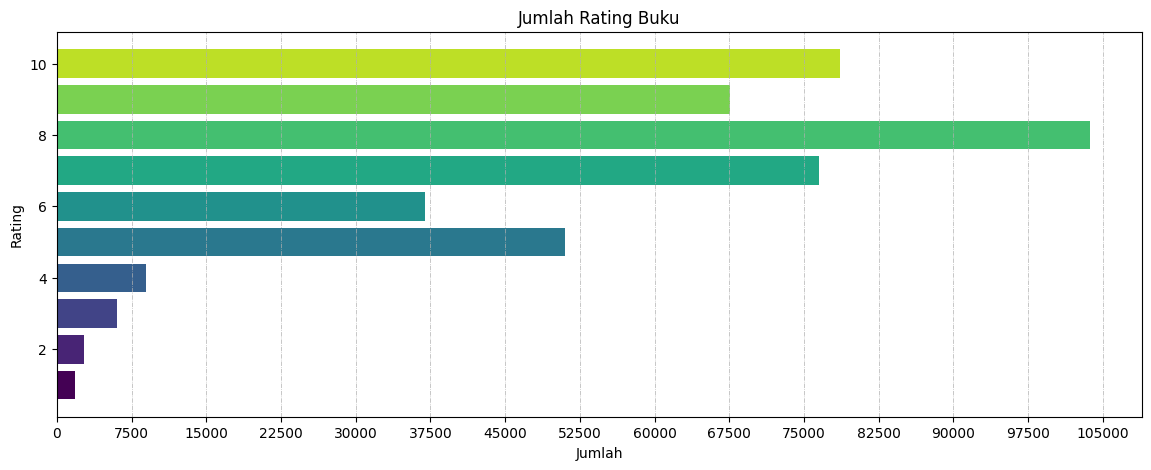

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, 11))

# Membuat plot histogram untuk rating buku
plt.figure(figsize=(14, 5))
plt.barh(rating['book_rating'].value_counts().sort_index().index,
         rating['book_rating'].value_counts().sort_index().values,
         color=colors)
plt.title('Jumlah Rating Buku')
plt.xlabel('Jumlah')
plt.ylabel('Rating')
plt.xticks(np.arange(0, 110000, 7500))
plt.grid(axis='x', linestyle='-.', linewidth=0.5)
plt.show()


Dari visualisasi histogram yang ditampilkan, dengan penghapusan *rating* 0, terlihat bahwa distribusi frekuensi menjadi lebih teratur dan mudah dipahami

### 5.1.3 Users

Sebelum melakukan *missing value implementation*, ingat bahwa sebelumnya telah dibahas di bagian analisis eksploratif data univariat bahwa fitur `age` di dataframe users memiliki kejanggalan karena nilainya lebih dari 200 tahun.

In [32]:
sorted_users = users.sort_values(by='age', ascending=False)
sorted_users

,user_id,location,age
20856,20857,"stuttgart, baden-wuerttemberg, germany",244.0
8781,8782,"calgary, alberta, canada",239.0
58285,58286,"midvale, utah, usa",237.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
8457,8458,"milano, lombardia, italy",230.0
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [33]:
ab_users = (users['age'] > 120).sum()
print(f"Jumlah user yang usianya lebih dari 120 tahun adalah: {ab_users}")

Jumlah user yang usianya lebih dari 120 tahun adalah: 78


Diketahui bahwa ada 78 data `users` memiliki usia lebih dari 120 tahun. Data-data tersebut akan dihilangkan dari *dataset*

In [34]:
users['age'] = pd.to_numeric(users['age'], errors='coerce')
del_users = users[users['age'] > 120].index
users.drop(del_users, inplace=True)

In [35]:
ab_users = (users['age'] > 120).sum()
print(f"Jumlah user yang usianya lebih dari 120 tahun adalah: {ab_users}")

Jumlah user yang usianya lebih dari 120 tahun adalah: 0


In [36]:
users['age'] = users['age'].astype('object')

Mengembalikan tipe data `age` ke *object*

In [37]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

Dari informasi yang diberikan, terlihat bahwa dalam *dataframe* `users`, atribut `age` memiliki sejumlah 110.762 entri yang tidak terisi atau *null*.

Oleh karena itu, entri yang tidak terisi pada data `age` bisa diatasi dengan menggantinya menggunakan nilai yang paling banyak terjadi, atau modus, melalui penerapan fungsi `.fillna()` bersamaan dengan `.mode()`. Metode `.mode()` dipilih karena fitur `age` bernilai integer bilangan bulat, sehingga akan lebih cocok untuk mengisi *`NaN`* dengan data yang sering muncul pada fitur `age`.

In [38]:
users.age = users.age.fillna(users.age.mode())
users.isnull().sum()

user_id          0
location         0
age         110761
dtype: int64

Fitur `age` sudah terisi penuh

<Axes: >

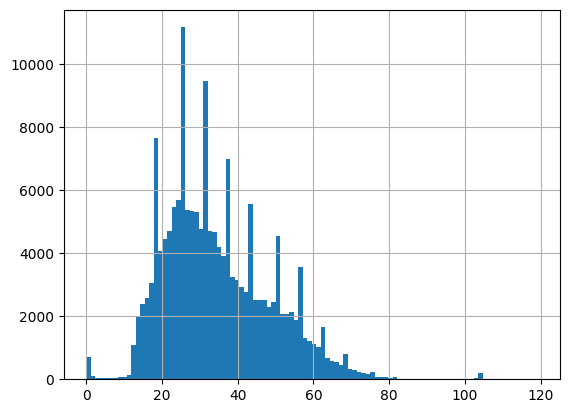

In [39]:
users.age.hist(bins=100)

Visualisasi histogram di atas menunjukan bahwa usia para *users* didominasi di rentang usia 20-an

## 5.2 *Data Duplicate*

Untuk memeriksa keberadaan data yang duplikat dalam *dataframe*, kita dapat menggunakan perintah `.duplicated().sum()` yang akan menghitung jumlah data yang duplikat.

In [40]:
def cetak_duplikat(df, nama_df):
    jumlah_duplikat = df.duplicated().sum()
    print(f'Jumlah data {nama_df} yang duplikat: {jumlah_duplikat}')

cetak_duplikat(books, 'books')
cetak_duplikat(rating, 'rating')
cetak_duplikat(users, 'users')

Jumlah data books yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data users yang duplikat: 0


Hasil penelusuran menunjukan bahwa tidak ada data duplikasi pada *dataframe* proyek ini.

## 5.3 *Merger Books and Rating*

*Dataframe* `books` dan `rating` memiliki fitur yang sama, yaitu `isbn`. Sehingga akan baik dilakukan merger untuk mendapatkan kesamaan dan korelasi antar dua *dataframe*.

In [41]:
books_rating = pd.merge(rating, books, on=['isbn'])
books_rating

,user_id,isbn,book_rating,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383833,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383834,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383835,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383836,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


# **6. *Model Development***

Langkah berikutnya dalam proyek ini adalah fase *modeling*, di mana kita akan mengembangkan model *machine learning* untuk sistem rekomendasi. Model ini akan menyarankan buku-buku yang paling sesuai untuk pengguna berdasarkan algoritma rekomendasi yang dipilih. Dari analisis data awal, kita mengetahui bahwa kita memiliki jumlah data yang sangat besar untuk buku, *rating*, dan pengguna, yang berkisar dari ratusan ribu hingga jutaan entri. Ukuran data ini dapat menyebabkan tantangan dalam hal biaya komputasi, seperti waktu pemrosesan yang lama dan kebutuhan akan RAM atau GPU dengan kapasitas besar.

Mengingat keterbatasan ini, kita akan membatasi dataset yang digunakan dalam pemodelan *machine learning* ini. Kita akan menggunakan hanya 20.000 entri teratas dari data buku dan 10.000 entri teratas dari data *rating*. Langkah ini akan membantu mengurangi beban komputasi sambil tetap memungkinkan kita untuk melatih model yang efektif dan memberikan rekomendasi yang berkualitas.

In [42]:
books   = books[:20000]
rating = rating[:10000]

## 6.1 *Content-based Recommendation*

*Content-based recommendations* adalah sistem rekomendasi yang menggunakan detail dan atribut dari item yang ada, seperti buku, film, atau produk lainnya, untuk memberikan saran yang sesuai dengan preferensi pengguna. Sistem ini menganalisis kata kunci dan atribut yang ditetapkan pada item dalam database untuk menghasilkan prediksi yang mungkin berguna bagi pengguna.

Dalam sistem ini, profil pengguna dibuat berdasarkan item-item yang mereka sukai atau interaksi yang mereka lakukan. Misalnya, jika seseorang sering menonton film bergenre komedi, sistem akan merekomendasikan film lain dengan genre yang sama atau yang memiliki karakteristik serupa.

### 6.1.1 TF-IDF Vectorizer

*Term Frequency Inverse Document Frequency Vectorizer*, atau [TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 'TfidfVectorizer - scikit-learn Documentation'), adalah sebuah metode untuk mengubah teks menjadi angka (vektor) yang dapat digunakan dalam pemrosesan data dan model *machine learning*. TF-IDF mengukur pentingnya sebuah kata dalam dokumen relatif terhadap kumpulan dokumen (korpus).

In [43]:
tf_idf = TfidfVectorizer()
tf_idf.fit(books.book_author)
tf_idf.get_feature_names_out()

array(['aa', 'aaron', 'aarsen', ..., 'â¼scher', 'â¼skind', 'â¼ter'],
      dtype=object)

Mengubah data buku yang memiliki kolom `book_author` menjadi format matriks bisa diwujudkan dengan memanfaatkan metode `.fit_transform()`.

In [44]:
tf_idf_matrix = tf_idf.fit_transform(books.book_author)
tf_idf_matrix.shape

(20000, 8877)

Hasil transformasi data tersebut menghasilkan sebuah matriks dengan dimensi yang terdiri dari 20.000 entri buku dan 8.877 entri penulis.

Hasil yang diperoleh dari *vectorizer* masih berupa vektor, dan untuk mengonversinya menjadi matriks, kita dapat menggunakan metode `.todense()`.

In [45]:
tf_idf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Agar matriks TF-IDF dapat dilihat dengan jelas, kita perlu mengonversinya menjadi *dataframe* dimana kolom-kolomnya diwakili oleh nama-nama *author* dan setiap barisnya, atau *index*, diisi dengan judul-judul buku.

In [46]:
pd.DataFrame(
    tf_idf_matrix.todense(),
    columns = tf_idf.get_feature_names_out(),
    index   = books.book_title
).sample(20, axis=1).sample(10, axis=0)

,narayan,kuswa,haas,estoril,las,hã,iain,ernaux,eade,gourevitch,shear,ladd,kemp,romain,heredia,troon,foucault,angley,kersh,alther
book_title,,,,,,,,,,,,,,,,,,,,
Women and Self-Esteem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antonio S and the Mystery of Theodore Guzman (Little Ark Book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firebrand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trauma Junkie: Memoirs of an Emergency Flight Nurse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shipping News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Girls' Guide to Hunting and Fishing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Making the Most of Your Money,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
It's Not About the Bike: My Journey Back to Life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Call back our yesterdays,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.1.2 *Cosine Similarity*

*Cosine Similarity* adalah metrik matematika yang digunakan untuk mengukur kesamaan antara dua vektor dalam ruang multidimensi. Ini didefinisikan sebagai kosinus sudut antara vektor, yang merupakan hasil perkalian titik dari vektor dibagi dengan hasil kali panjang mereka. Metrik ini sangat berguna dalam analisis teks dan sistem rekomendasi, di mana teks diubah menjadi vektor kata dan kesamaan semantik antara dokumen dapat diukur berdasarkan arah vektor tersebut, bukan hanya berdasarkan magnitudo atau ukuran mereka. Cosine Similarity selalu berada dalam interval -1 hingga 1, di mana -1 berarti persis berlawanan, 0 menunjukkan ortogonal atau tidak berkorelasi, dan 1 berarti persis sama.

Untuk menentukan seberapa mirip satu judul buku dengan yang lain, kita bisa menggunakan teknik *cosine similarity*. Fungsi [`cosine_similarity`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html 'cosine_similarity - scikit-learn Documentation') dari perpustakaan `sklearn` memungkinkan kita untuk melakukan perhitungan ini.

In [47]:
cosine_sim = cosine_similarity(tf_idf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Menggunakan metode yang serupa, kita dapat mengonversi *array* dari *cosine similarity* menjadi *dataframe* untuk memudahkan dalam melihat dan menganalisis datanya.

In [48]:
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    columns = books.book_title,
    index   = books.book_title
)

print(f'Cosine Similarity Shape : {cosine_sim_df.shape}')

cosine_sim_df.sample(8, axis=1).sample(8, axis=0)

Cosine Similarity Shape : (20000, 20000)


book_title,David Copperfield's Tales of the Impossible,Killing Floor,Almost blue (Stile libero),Someday My Prince,From a Buick 8,"A Murder, a Mystery and a Marriage: A Story",La ignorancia,Alice's Adventures in Wonderland and Through the Looking Glass
book_title,,,,,,,,
Our Man in Havana: An Entertainment (Twentieth Century Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Out of the Shadows (Shadows Trilogy (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canadians on Everest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Tulip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chicken Soup for the Cat and Dog Lover's Soul - Celebrating Pets as Family with Stories About Cats, Dogs and Other Critters",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prime Witness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allie's Crocodile (Young Puffin Confident Readers),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Iron Giant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6.1.3 Recommendation Testing

Membuat fungsi `author_recommendations` bertujuan untuk menunjukkan saran buku dari sistem algoritma yang telah dikembangkan, dengan menggunakan judul buku yang telah dibaca oleh pengguna sebagai parameter masukannya.

In [49]:
def author_recommendations(book_title, similarity_data=cosine_sim_df, items=books[['book_title', 'book_author']], k=10):
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [50]:
readed_book_title = 'Room for a Single Lady'

Mengambil sample buku yang sudah dibaca

In [51]:
books[books.book_title.eq(readed_book_title)]

,isbn,book_title,book_author,pub_year,publisher,image_s_url,image_m_url,image_l_url
8005,034910901X,Room for a Single Lady,Clare Boylan,0,Little Brown Company,http://images.amazon.com/images/P/034910901X.0...,http://images.amazon.com/images/P/034910901X.0...,http://images.amazon.com/images/P/034910901X.0...


Dalam situasi tertentu, sistem rekomendasi mungkin menghasilkan saran buku yang sama lebih dari satu kali, yang mengharuskan kita untuk mengeliminasi judul-judul buku yang sama tersebut dari daftar rekomendasi.

In [52]:
author_recommendations(readed_book_title).drop_duplicates()

,book_title,book_author
0,11 Edward Street,Clare Boylan
1,Dog Handling,CLARE NAYLOR
2,Love: A User's Guide,CLARE NAYLOR
3,Ratha's Challenge,Clare Bell
4,Catching Alice,Clare Naylor
5,She's Not There : A Life in Two Genders,JENNIFER FINNEY BOYLAN
6,Karma and Reincarnation: Transcending Your Pas...,Elizabeth Clare Prophet
7,Creative Abundance: Keys to Spiritual and Mate...,Elizabeth Clare Prophet
8,The Complete Book of Massage,CLARE MAXWELL-HUDSON
9,Business @ the Speed of Thought: Succeeding in...,Bill Gates


Terlihat bahwa sistem yang dikembangkan mampu memberikan saran beberapa buku berdasarkan masukan judul buku "*Room for a Single Lady*", dengan hasil yang didasarkan pada analisis algoritma sistem. Terlihat bahwa rekomendasi yang dihasilkan merujuk ke penulisa buku yang ada nama Clare, dan menghasilkan satu rekomendasi dengan penulis buku yang sama dengan buku yang telah di baca, yaitu *11 Edward Street* oleh Clare Boylan.

## 6.2 *Collaborative Filtering Recommendation*

*Collaborative Filtering Recommendation* adalah teknik yang digunakan dalam sistem rekomendasi untuk memprediksi preferensi atau minat pengguna berdasarkan preferensi atau minat pengguna lain yang serupa. Teknik ini tidak mengandalkan konten item yang direkomendasikan, melainkan pada pola interaksi dan penilaian yang dilakukan oleh pengguna terhadap item-item tersebut.

### 6.2.1 *Data Preparation*

Sekarang kita berada di fase *preprocessing*. Di sini, kita harus mempersiapkan data dengan mengubah fitur `user_id` dan `isbn` menjadi indeks integer.

Melakukan penyandian (*encoding*) fitur `user_id` ke dalam indeks integer.

In [53]:
user_ids = rating.user_id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [54]:
print(user_ids)
print(user_to_user_encoded)
print(user_encoded_to_user)

[276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276812, 276813, 276814, 276820, 276822, 276827, 276828, 276830, 276832, 276835, 276837, 276842, 276847, 276848, 276850, 276853, 276854, 276857, 276859, 276861, 276862, 276863, 276866, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276949, 276953, 276954, 276957, 276959, 276964, 276965, 276984, 276986, 276988, 276990, 276992, 276994, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277023, 277028, 277031, 277032, 277036, 277042, 277048, 277051, 277052, 277053, 277056, 277058, 277065, 277072, 277074, 277079, 277085, 277087, 277090, 277094, 277096, 277107, 277109, 277116, 277124, 277128, 277129, 277134, 277135, 277139, 277143, 277157, 277159, 277165,

Melakukan penyandian (*encoding*) fitur `isbn` buku ke dalam indeks integer.

In [55]:
book_ids = rating.isbn.unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [56]:
print(book_ids)
print(book_to_book_encoded)
print(book_encoded_to_book)

['0155061224', '052165615X', '0521795028', '3257224281', '0600570967', '038550120X', '342310538', '0060517794', '0671537458', '0679776818', '0943066433', '1885408226', '0747558167', '3596218098', '0684867621', '0451166892', '8440682697', '0380711524', '3453092007', '3453213025', 'N3453124715', '9057868059', '0553572369', '3499230933', '3596151465', '3442136644', '8484330478', '8484332039', '2864322102', '8437606322', '8466300821', '8478442588', '0345443683', '043935806X', '055310666X', '0330332775', '0006379702', '3442131340', '3548603203', '1562827898', '0440498058', '0395547032', '0440414121', '8879839993', '8423996565', '8426449476', '8426449573', '8478884831', '8478885218', '8478885463', '8478886044', '0091830893', '0586207414', '0812571029', '0140260498', '0060096195', '0141310340', '0142302198', '0156006065', '0375821813', '038076041X', '0439401399', '0552546933', '0689804458', '0699854289', '0786812508', '0786817070', '0805057706', '1551925060', '1573248533', '000651118X', '2253

Selanjutnya, kita akan menetapkan `user_id` dan `isbn` ke dataframe yang sesuai.

In [57]:
rating['user'] = rating.user_id.map(user_to_user_encoded)
rating['book'] = rating.isbn.map(book_to_book_encoded)

Kita akan melakukan verifikasi terhadap total jumlah pengguna, total jumlah buku, serta nilai *rating* terendah dan tertinggi.

In [58]:
num_users = len(user_encoded_to_user)
num_books = len(book_encoded_to_book)

min_rating = min(rating.book_rating)
max_rating = max(rating.book_rating)

print(num_users)
print(num_books)
print(f'Number of User: {num_users}, Number of Books: {num_books}, Min Rating: {min_rating}, Max Rating: {max_rating}')

2248
8791
Number of User: 2248, Number of Books: 8791, Min Rating: 1, Max Rating: 10


### 6.2.2 *Training Data and Validation Data Split*

Kita akan mengaudit *dataframe* `ratings` untuk memastikan bahwa kolom tambahan `user` dan `book` telah terpetakan dengan benar. Kita juga akan mengacak urutan data menggunakan metode [`.sample(frac=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html 'pandas.DataFrame.sample - Pandas Documentation').

In [59]:
rating = rating.sample(frac=1, random_state=42)
rating

,user_id,isbn,book_rating,user,book
17445,3167,0345355237,10,1500,5621
14100,2030,0809237628,10,1173,4285
4052,278209,0060168862,8,446,1672
14192,2033,0553573136,8,1174,4336
13811,1903,067162248X,10,1135,4134
...,...,...,...,...,...
16092,2630,0394541545,8,1365,5203
14966,2276,0425053008,5,1255,4733
15435,2313,0385470142,9,1266,4907
2039,277478,0312979533,7,215,846


Melakukan pembagian *dataset* dengan rasio 80:20, yaitu 80% untuk data latih (*training data*) dan 20% untuk data uji (*validation data*).

Kemudian, kita akan membagi data menjadi set pelatihan dan validasi dengan perbandingan 80:20. Sebelum itu, kita harus menggabungkan `user` dan `book` menjadi satu nilai yang unik. Setelah itu, kita normalisasi nilai `book_rating` ke rentang 0 hingga 1 untuk mempermudah proses pelatihan.

In [60]:
x = rating[['user', 'book']].values
y = rating['book_rating'].apply(lambda x: (x-min_rating) / (max_rating-min_rating)).values

train_indices = int(0.8 * rating.shape[0])

xTrain, xVal, yTrain, yVal = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[1500 5621]
 [1173 4285]
 [ 446 1672]
 ...
 [1266 4907]
 [ 215  846]
 [1656 6522]] [1.         1.         0.77777778 ... 0.88888889 0.66666667 0.66666667]


### 6.2.3 *Model Development and Training*

Di tahap ini, model akan mengevaluasi seberapa cocok pengguna dengan restoran menggunakan metode embedding. Pertama-tama, kita akan menerapkan proses `embedding` pada data `user` dan `book`. Kemudian, kita akan menghitung hasil perkalian *dot product* dari `embedding` `user` dan `book`. Kita juga bisa menambahkan bias untuk masing-masing `user` dan `book`. Nilai kecocokan akan diatur dalam rentang [0,1] menggunakan fungsi aktivasi `sigmoid`.

Pada tahap pembuatan model akan menggunakan kelas `RecommenderNet` dengan [*keras model class*](https://keras.io/api/models/model 'Model class - Keras Documentation').

In [61]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias      = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0])
        user_bias   = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias   = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)

        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

Selanjutnya, dalam langkah *model compiling*, kita akan memilih [Adam optimizer](https://keras.io/api/optimizers/adam 'Adam - Keras Documentation'), [binary crossentropy loss function](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class 'BinaryCrossentropy - Keras Documentaion'), dan metrik [RMSE](https://keras.io/api/metrics/regression_metrics/#rootmeansquarederror-class 'RootMeanSquaredError - Keras Documentation') (Root Mean Squared Error) sebagai parameter.

In [62]:
model = RecommenderNet(num_users, num_books, 50)

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss      = tf.keras.losses.BinaryCrossentropy(),
    metrics   = [tf.keras.metrics.RootMeanSquaredError()]
)

Untuk melatih model, kita akan menggunakan metode `.fit()`, menetapkan `batch_size` menjadi 20 dan jumlah `epochs` sebanyak 25.

In [63]:
history = model.fit(
    x               = xTrain,
    y               = yTrain,
    batch_size      = 20,
    epochs          = 40,
    validation_data = (xVal, yVal),
)

Epoch 1/40
400/400 [==============================] - 11s 20ms/step - loss: 0.6839 - root_mean_squared_error: 0.3038 - val_loss: 0.6748 - val_root_mean_squared_error: 0.2934
Epoch 2/40
400/400 [==============================] - 6s 14ms/step - loss: 0.5859 - root_mean_squared_error: 0.2124 - val_loss: 0.6683 - val_root_mean_squared_error: 0.2877
Epoch 3/40
400/400 [==============================] - 5s 14ms/step - loss: 0.5696 - root_mean_squared_error: 0.1952 - val_loss: 0.6685 - val_root_mean_squared_error: 0.2879
Epoch 4/40
400/400 [==============================] - 7s 17ms/step - loss: 0.5624 - root_mean_squared_error: 0.1879 - val_loss: 0.6657 - val_root_mean_squared_error: 0.2855
Epoch 5/40
400/400 [==============================] - 6s 14ms/step - loss: 0.5584 - root_mean_squared_error: 0.1843 - val_loss: 0.6639 - val_root_mean_squared_error: 0.2840
Epoch 6/40
400/400 [==============================] - 6s 15ms/step - loss: 0.5547 - root_mean_squared_error: 0.1802 - val_loss: 0.6610

Kita akan memvisualisasikan *error* dari hasil *training* dan validasi, serta *loss* dari *training* dan validasi, menggunakan grafik yang dibuat dengan *library* [`matplotlib`](https://matplotlib.org 'Matplotlib - Visualization with Python').

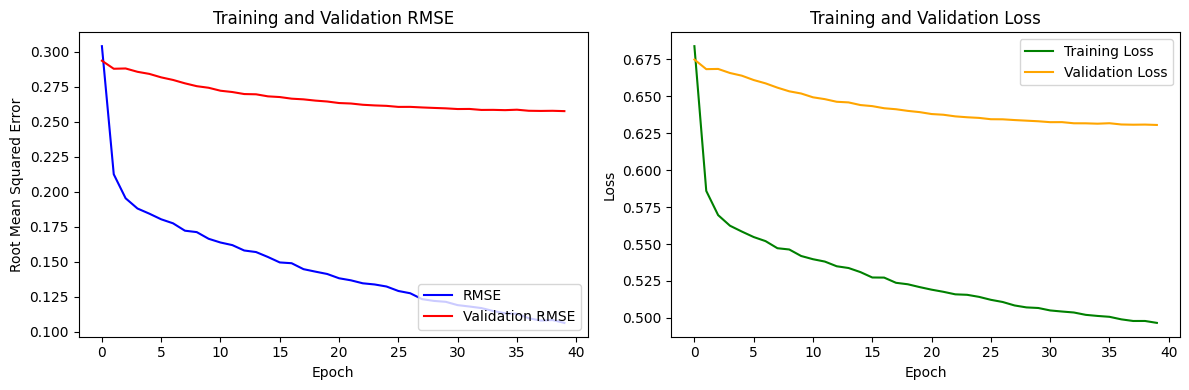

In [64]:
rmse_data = history.history['root_mean_squared_error']
val_rmse_data = history.history['val_root_mean_squared_error']
loss_data = history.history['loss']
val_loss_data = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(rmse_data, label='RMSE', color='blue')
ax1.plot(val_rmse_data, label='Validation RMSE', color='red')
ax1.set_title('Training and Validation RMSE')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Root Mean Squared Error')
ax1.legend(loc='lower right')

ax2.plot(loss_data, label='Training Loss', color='green')
ax2.plot(val_loss_data, label='Validation Loss', color='orange')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## 6.2.4 *Get Recommendation Testing*

Melakukan pendefinisian ulang *dataset* *books* dan *ratings*.

In [65]:
datasetBook   = books
datasetRating = rating

In [66]:
datasetBook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   isbn         20000 non-null  object
 1   book_title   20000 non-null  object
 2   book_author  20000 non-null  object
 3   pub_year     20000 non-null  object
 4   publisher    20000 non-null  object
 5   image_s_url  20000 non-null  object
 6   image_m_url  20000 non-null  object
 7   image_l_url  20000 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


Untuk menghasilkan saran buku dari sistem, kita memerlukan sampel data pengguna yang diambil secara acak. Kita juga perlu menentukan variabel untuk buku yang belum dibaca oleh pengguna (`notReadedBooks`), yang akan menjadi daftar rekomendasi. Kita bisa mendapatkan daftar ini dengan menerapkan operator bitwise NOT ([`~`](https://docs.python.org/3/reference/expressions.html#unary-arithmetic-and-bitwise-operations 'Unary Arithmetic and Bitwise Operations - Python Documentation')) pada variabel yang menyimpan buku yang sudah dibaca oleh pengguna (`readedBooks`).

In [67]:
userId      = datasetRating.user_id.sample(1).iloc[0]
readedBooks = datasetRating[datasetRating.user_id == userId]

notReadedBooks = datasetBook[~datasetBook['isbn'].isin(readedBooks.isbn.values)]['isbn']
notReadedBooks = list(
    set(notReadedBooks).intersection(set(book_to_book_encoded.keys()))
)

notReadedBooks = [[book_to_book_encoded.get(x)] for x in notReadedBooks]
userEncoder    = user_to_user_encoded.get(userId)
userBookArray = np.hstack(
    ([[userEncoder]] * len(notReadedBooks), notReadedBooks)
)

Untuk mendapatkan saran buku, kita dapat memanggil metode [`.predict()`](https://keras.io/api/models/model 'Model class - Keras Documentation') pada model yang telah dilatih dengan *library Keras*.

In [68]:
ratings = model.predict(userBookArray).flatten()

topRatingsIndices   = ratings.argsort()[-10:][::-1]
recommendedBookIds = [
    book_encoded_to_book.get(notReadedBooks[x][0]) for x in topRatingsIndices
]

print('Showing recommendations for users: {}'.format(userId))
print('=====' * 8)
print('Book with high ratings from user')
print('-----' * 8)

topBookUser = (
    readedBooks.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .isbn.values
)

bookDfRows = datasetBook[datasetBook['isbn'].isin(topBookUser)]
for row in bookDfRows.itertuples():
    print(row.book_title, ':', row.book_author)

print('=====' * 8)
print('Top 10 Books Recommendation')
print('-----' * 8)

recommended_resto = datasetBook[datasetBook['isbn'].isin(recommendedBookIds)]
for row in recommended_resto.itertuples():
    print(row.book_title, ':', row.book_author)

178/178 [==============================] - 0s 1ms/step
Showing recommendations for users: 695
Book with high ratings from user
----------------------------------------
Elements of Programming With Perl : Andrew L. Johnson
To Catch a Cat : Marian Babson
People of the Wolf (The First North Americans series, Book 1) : W. Michael Gear
The Door to December : Dean R. Koontz
Top 10 Books Recommendation
----------------------------------------
To Kill a Mockingbird : Harper Lee
The Red Tent (Bestselling Backlist) : Anita Diamant
The Bell Jar : A Novel (Perennial Classics) : Sylvia Plath
The Da Vinci Code : Dan Brown
The Unknown Errors of Our Lives: Stories : Chitra Banerjee Divakaruni
1984 : George Orwell
The Message (Animorphs , No 4) : K. A. Applegate
The Runaway Jury : JOHN GRISHAM
Kushiel's Dart : Jacqueline Carey
By the Sword (Kerowyn's Tale) : Mercedes Lackey


Dari informasi yang diberikan, tampaknya sistem telah memilih secara acak seorang pengguna dengan `user_id` **695**. Sistem kemudian mencari buku-buku yang paling disukai oleh pengguna tersebut, yang meliputi:
*   **Elements of Programming With Perl** karya **Andrew L. Johnson**
*   **To Catch a Cat** karya **Marian Babson**
*   **People of the Wolf (The First North Americans series, Book 1)** karya **W. Michael Gear**
*   **The Door to December** karya **Dean R. Koontz**

Setelah itu, sistem akan membandingkan buku-buku dengan penilaian tertinggi dari pengguna ini dengan seluruh katalog buku, kecuali yang sudah dibaca, dan mengurutkan rekomendasi berdasarkan skor tertinggi. Terlihat ada 10 buku yang direkomendasikan oleh sistem. Rekomendasi yang diberikan benar-benar tidak ada kesamaan penulis buku dari buku yang sudah dibaca. Ini menunjukan bahwa rekomendasi dibentuk dari hasil kesamaan para `users` lainnya.


# **7. Kesimpulan**

Ringkasannya, model rekomendasi buku yang telah dikembangkan berhasil memenuhi kebutuhan pengguna dengan menggabungkan dua pendekatan: *Content-based Recommendation* dan *Collaborative Filtering Recommendation*. Dalam *Collaborative Filtering Recommendation*, penting untuk memiliki data peringkat dari pengguna untuk memahami dan memprediksi preferensi mereka. Sebaliknya, *Content-based Recommendation* tidak bergantung pada peringkat pengguna, tetapi lebih fokus pada analisis fitur-fitur spesifik dari buku itu sendiri.

Dengan memanfaatkan kedua teknik ini, model dapat memberikan saran yang sangat relevan dan personal, karena tidak hanya mempertimbangkan apa yang telah dinikmati oleh pengguna di masa lalu, tetapi juga menemukan pilihan baru yang serupa dengan minat mereka berdasarkan karakteristik buku. Ini menciptakan pengalaman yang kaya dan bervariasi, memungkinkan pengguna untuk menemukan karya-karya baru yang mungkin belum pernah mereka pertimbangkan sebelumnya, sambil tetap sejalan dengan selera pribadi mereka.